Taking the data from http://archive.ics.uci.edu/ml/datasets/Post-Operative+Patient
Data description-
1. Data set characteristic - multivariate
2. Attributes- Categorical, Integer
3. Number of attributes- 8 (L-CORE, L-SURF, L-O2, L-BP, SURF-STBL, CORE-STBL, BP-STBL,COMFORT, ADM-DECS)
4. Number of instances- 90
5. Missing values- Present
6. Task- Classification


Some of the Preprocessing steps are-
(https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d)
1. Handle null values
2. Standardization
3. Handle Categorical Variable
4. One hot encoding 
5. Multicollinearility


 1. Handle Null values-
check df.isnull or df.isnull().sum()
using drop.na() to remove or you can impute using SimpleImputer or by median or interpolate()

 2. Standardizaation-
transform with mean 0 and s.d. 1
so that more weightage is not given to one feature
Use StandardScaler fro sklearn


 3. Categorical Variable-
2 types- 
a) Ordinal- can be ordered S < M < L
use map() or LabelEncoder() from sklearn
b) Nominal- Green, Red, Blue
do not use mapping or label encoding for nominal, instead use-
 4. One-hot encoding- for doing one-hot encoding use pd.get_dummies()

 5. Multicollinearity - 
do a pair plot to see how two features are related to each other and how they impact each other
or use a correlation matrix to see the relation
drop_first() = True to avoid collinearity ( in pd.get_dummies) 


In [1]:
#performing preprocessing steps and visualization (using Seaborn) 

#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#load the data
names = ['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL','COMFORT', 'ADM-DECS']
postop = pd.read_csv(r"C:\Users\shrey\OneDrive\Documents\Biomedical Data ScienceFall19\HW\HW1\post-operative.data", names = names, sep =',' )

In [3]:
postop.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [4]:
postop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   L-CORE     90 non-null     object
 1   L-SURF     90 non-null     object
 2   L-O2       90 non-null     object
 3   L-BP       90 non-null     object
 4   SURF-STBL  90 non-null     object
 5   CORE-STBL  90 non-null     object
 6   BP-STBL    90 non-null     object
 7   COMFORT    90 non-null     int64 
 8   ADM-DECS   90 non-null     object
dtypes: int64(1), object(8)
memory usage: 6.5+ KB


In [5]:
#see the null or NaN values in the columns
postop.isnull().sum()


L-CORE       0
L-SURF       0
L-O2         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      0
ADM-DECS     0
dtype: int64

In [6]:
#check if there is a zero in the data values
0 in postop.values

True

In [7]:
#see which locations have 0
postop_zero = postop.loc[postop['COMFORT'] == 0]
postop_zero


,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
46,low,mid,good,high,unstable,stable,stable,0,I
48,high,high,excellent,high,stable,stable,unstable,0,A
70,mid,low,excellent,mid,unstable,unstable,unstable,0,A


In [8]:
#if you want to remove rows with zeroes in them
newpostop = postop.loc[postop['COMFORT'] != 0]
newpostop.info()
#3rows removed 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 89
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   L-CORE     87 non-null     object
 1   L-SURF     87 non-null     object
 2   L-O2       87 non-null     object
 3   L-BP       87 non-null     object
 4   SURF-STBL  87 non-null     object
 5   CORE-STBL  87 non-null     object
 6   BP-STBL    87 non-null     object
 7   COMFORT    87 non-null     int64 
 8   ADM-DECS   87 non-null     object
dtypes: int64(1), object(8)
memory usage: 6.8+ KB


In [9]:
#location 70 in comfort has zero value, check the value at 70th row
postop.loc[70]
#we can see COMFORT is 0 at this position, let's replace it wwith the mean

L-CORE             mid
L-SURF             low
L-O2         excellent
L-BP               mid
SURF-STBL     unstable
CORE-STBL     unstable
BP-STBL       unstable
COMFORT              0
ADM-DECS             A
Name: 70, dtype: object

In [10]:
#there were no NaN values, see if the missing values have been replaced by any special signs or symbols
postop['COMFORT'] = postop['COMFORT'].replace(0, postop['COMFORT'].mean())

In [11]:
postop.loc[70]

L-CORE             mid
L-SURF             low
L-O2         excellent
L-BP               mid
SURF-STBL     unstable
CORE-STBL     unstable
BP-STBL       unstable
COMFORT        10.5778
ADM-DECS             A
Name: 70, dtype: object

In [12]:
#After replacing the zero values with mean, let's do the next preprocessing steps
#Convert the categorical data 
#To convert the ordinal data, let's use label encoder
#All the categorical data for us here is ordinal, so we will either be using map() or LabelEncoder()


In [13]:
#Using map() for L-Core
temp_map = {'high' : 3, 'mid' : 2,'low' : 1}
postop['L-CORE'] = postop['L-CORE'].map(temp_map)


In [14]:
#for L-SURF
postop['L-SURF'] = postop['L-SURF'].map(temp_map)

In [15]:
#for L-o2
temp_map2 = {'excellent' : 2, 'good' : 1}
postop['L-O2'] = postop['L-O2'].map(temp_map2)

In [16]:
#for L-BP
postop['L-BP'] = postop['L-BP'].map(temp_map)

In [17]:
#for SURF-STBL
stable_map = {'stable' : 3, 'mod-stable' : 2, 'unstable' : 1}
postop['SURF-STBL'] = postop['SURF-STBL'].map(stable_map)

In [18]:
postop['CORE-STBL'] = postop['CORE-STBL'].map(stable_map)

In [19]:
postop['BP-STBL'] = postop['BP-STBL'].map(stable_map)

In [20]:
postop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L-CORE     90 non-null     int64  
 1   L-SURF     90 non-null     int64  
 2   L-O2       90 non-null     int64  
 3   L-BP       90 non-null     int64  
 4   SURF-STBL  90 non-null     int64  
 5   CORE-STBL  90 non-null     int64  
 6   BP-STBL    90 non-null     int64  
 7   COMFORT    90 non-null     float64
 8   ADM-DECS   90 non-null     object 
dtypes: float64(1), int64(7), object(1)
memory usage: 6.5+ KB


In [21]:
postop['ADM-DECS'].values


array(['A', 'S', 'A', 'A ', 'A', 'S', 'S', 'S', 'S', 'S', 'A', 'A', 'A',
       'A', 'S', 'A', 'A', 'A', 'A', 'A', 'A', 'S', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'S', 'A', 'A', 'A', 'A', 'A', 'A', 'S', 'S', 'S',
       'A', 'A', 'S', 'S', 'S', 'A', 'S', 'I', 'A', 'A', 'A', 'A', 'A',
       'A', 'S', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'S', 'A',
       'S', 'A', 'A', 'A', 'A', 'A', 'A', 'S', 'A', 'A', 'A', 'A', 'A',
       'S', 'A', 'A', 'S', 'I', 'A', 'A', 'A', 'S', 'A', 'A', 'S'],
      dtype=object)

In [22]:
postop['L-CORE'].values


array([2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 1, 1,
       2, 2, 3, 1, 3, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 3, 2,
       1, 1, 1, 2, 3, 2, 2, 1, 2, 2, 3, 2, 3, 2, 1, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2], dtype=int64)

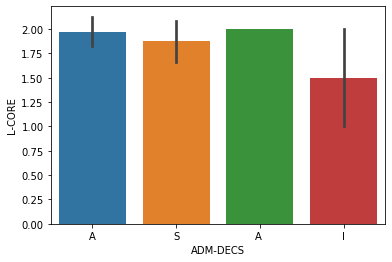

In [23]:
import seaborn as sns
plot1  = sns.barplot(x = "ADM-DECS" , y = 'L-CORE', data = postop)

The barplot between ADM-DECS and L-CORE
For L-CORE
#high- 3, mid -2, low -1
For ADM-DECS
#I (patient sent to Intensive Care Unit),S (patient prepared to go home), A (patient sent to general hospital floor)
As we can see in the graph, patients with L-CORE of 1 (low temperature), were sent to ICU
patients with mid, around 2 were referred to general

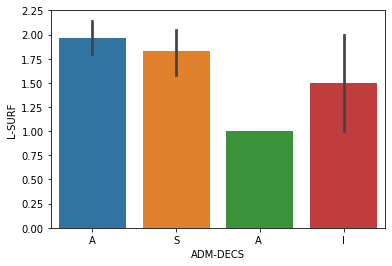

In [24]:
plot2  = sns.barplot(x = "ADM-DECS" , y = 'L-SURF', data = postop)

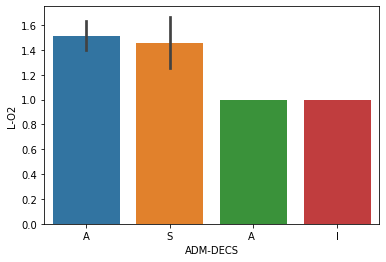

In [25]:
plot3  = sns.barplot(x = "ADM-DECS" , y = 'L-O2', data = postop)

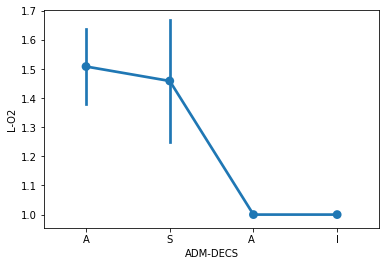

In [26]:
plot3  = sns.pointplot(x = "ADM-DECS" , y = 'L-O2', data = postop)

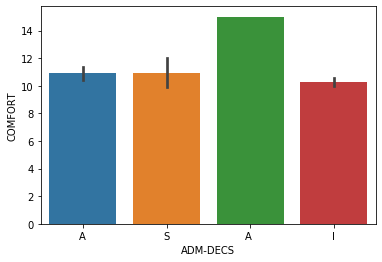

In [27]:
plot3  = sns.barplot(x = "ADM-DECS" , y = 'COMFORT', data = postop)

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(postop["ADM-DECS"].values)
y
    

array([0, 3, 0, 1, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3,
       0, 3, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 0, 0, 3, 0,
       0, 3])

In [29]:
le.inverse_transform(y)

array(['A', 'S', 'A', 'A ', 'A', 'S', 'S', 'S', 'S', 'S', 'A', 'A', 'A',
       'A', 'S', 'A', 'A', 'A', 'A', 'A', 'A', 'S', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'S', 'A', 'A', 'A', 'A', 'A', 'A', 'S', 'S', 'S',
       'A', 'A', 'S', 'S', 'S', 'A', 'S', 'I', 'A', 'A', 'A', 'A', 'A',
       'A', 'S', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'S', 'A',
       'S', 'A', 'A', 'A', 'A', 'A', 'A', 'S', 'A', 'A', 'A', 'A', 'A',
       'S', 'A', 'A', 'S', 'I', 'A', 'A', 'A', 'S', 'A', 'A', 'S'],
      dtype=object)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [31]:
X=postop.drop("ADM-DECS",axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L-CORE     90 non-null     int64  
 1   L-SURF     90 non-null     int64  
 2   L-O2       90 non-null     int64  
 3   L-BP       90 non-null     int64  
 4   SURF-STBL  90 non-null     int64  
 5   CORE-STBL  90 non-null     int64  
 6   BP-STBL    90 non-null     int64  
 7   COMFORT    90 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 5.8 KB


In [32]:
X.shape

(90, 8)

In [33]:
y.shape


(90,)

In [34]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split

def data_part(X, y, split_size) :
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = split_size)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [35]:
#Reference: https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3
X_train, X_test, y_train, y_test=data_part(X,y,split_size=0.3)

(63, 8)
(27, 8)
(63,)
(27,)


 OR you can try this, without making function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

In [36]:
#Now we do Standardization, transforming the data to the same scale
#Feature Scaling, do this on the features not label

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[14,  0,  0,  5],
       [ 0,  0,  0,  1],
       [ 2,  0,  0,  0],
       [ 4,  0,  0,  1]], dtype=int64)

In [41]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.14      0.20      0.17         5

    accuracy                           0.56        27
   macro avg       0.21      0.23      0.22        27
weighted avg       0.52      0.56      0.54        27

[[14  0  0  5]
 [ 0  0  0  1]
 [ 2  0  0  0]
 [ 4  0  0  1]]


C:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [43]:
y_pred2 = classifier2.predict(X_test)

In [44]:
print(metrics.classification_report(y_test, y_pred2))
print(metrics.confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        19
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.50      0.40      0.44         5

    accuracy                           0.74        27
   macro avg       0.32      0.34      0.33        27
weighted avg       0.64      0.74      0.69        27

[[18  0  0  1]
 [ 1  0  0  0]
 [ 1  0  0  1]
 [ 3  0  0  2]]


C:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
 from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression(random_state = 0)
classifier3.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred3 = classifier2.predict(X_test)

In [47]:
print(metrics.classification_report(y_test, y_pred3))
print(metrics.confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        19
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.50      0.40      0.44         5

    accuracy                           0.74        27
   macro avg       0.32      0.34      0.33        27
weighted avg       0.64      0.74      0.69        27

[[18  0  0  1]
 [ 1  0  0  0]
 [ 1  0  0  1]
 [ 3  0  0  2]]


C:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
